In [135]:
import torch
from torchvision import models

In [9]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [10]:
alexnet = models.AlexNet()

In [11]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\AbdulrazzakAbd/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [12]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225])
])

In [2]:
from PIL import Image
import requests as req
from io import BytesIO
from_url = req.get('https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/bobby.jpg')

img = Image.open(BytesIO(from_url.content))

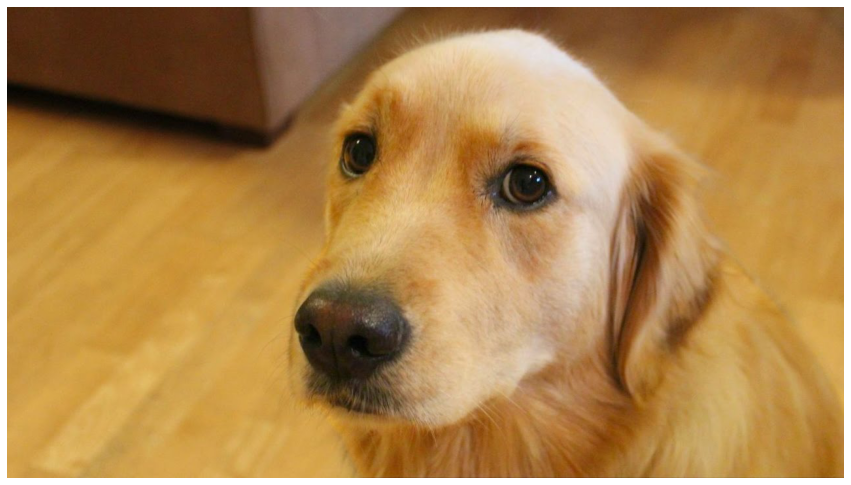

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.imshow(img)
_ = plt.axis('off')

In [59]:
img_t = preprocess(img)

In [62]:
batch_t = torch.unsqueeze(img_t, 0)
batch_t

tensor([[[[-0.6281, -0.6623, -0.6794,  ...,  0.0056, -0.0287, -0.0629],
          [-0.7137, -0.7137, -0.7137,  ...,  0.0398,  0.0227,  0.0056],
          [-0.7137, -0.7137, -0.7137,  ...,  0.0398,  0.0569,  0.0569],
          ...,
          [ 1.4440,  1.4269,  1.4783,  ...,  0.6049,  0.6221,  0.6906],
          [ 1.4269,  1.4440,  1.4783,  ...,  0.6906,  0.6734,  0.7077],
          [ 1.4612,  1.4783,  1.5125,  ...,  0.6906,  0.7248,  0.7419]],

         [[-1.2829, -1.2829, -1.2829,  ..., -0.6352, -0.6702, -0.7052],
          [-1.2654, -1.2479, -1.2654,  ..., -0.6176, -0.6527, -0.7052],
          [-1.2479, -1.2479, -1.2654,  ..., -0.6176, -0.6001, -0.6527],
          ...,
          [ 0.7829,  0.8004,  0.8704,  ..., -0.3025, -0.2675, -0.2150],
          [ 0.7654,  0.8354,  0.9055,  ..., -0.2150, -0.2150, -0.1625],
          [ 0.8004,  0.8529,  0.9230,  ..., -0.1800, -0.1275, -0.0749]],

         [[-1.4907, -1.4559, -1.4210,  ..., -1.0376, -1.0898, -1.1421],
          [-1.5081, -1.4559, -

In [64]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [67]:
out = resnet(batch_t)

In [68]:
out

tensor([[-3.4803e+00, -1.6618e+00, -2.4515e+00, -3.2662e+00, -3.2466e+00,
         -1.3611e+00, -2.0465e+00, -2.5112e+00, -1.3043e+00, -2.8900e+00,
         -1.6862e+00, -1.3055e+00, -2.6129e+00, -2.9645e+00, -2.4300e+00,
         -2.8143e+00, -3.3019e+00, -7.9404e-01, -6.5182e-01, -1.2308e+00,
         -3.0193e+00, -3.9457e+00, -2.2675e+00, -1.0811e+00, -1.0232e+00,
         -1.0442e+00, -3.0918e+00, -2.4613e+00, -2.1964e+00, -3.2354e+00,
         -3.3013e+00, -1.8553e+00, -2.0921e+00, -2.1327e+00, -1.9102e+00,
         -3.2403e+00, -1.1396e+00, -1.0925e+00, -1.2186e+00, -9.3332e-01,
         -4.5093e-01, -1.5489e+00,  1.4161e+00,  1.0871e-01, -1.8442e+00,
         -1.4806e+00,  9.6227e-01, -9.9456e-01, -3.0060e+00, -2.7384e+00,
         -2.5798e+00, -2.0666e+00, -1.8022e+00, -1.9328e+00, -1.7726e+00,
         -1.3041e+00, -4.5848e-01, -2.0537e+00, -3.2804e+00, -5.0451e-01,
         -3.8174e-01, -1.1147e+00, -7.3998e-01, -1.4299e+00, -1.4883e+00,
         -2.1073e+00, -1.7373e+00, -4.

In [88]:
classes = req.get('https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/imagenet_classes.txt')
classes = classes.text.split('\n')
sorted(list(zip(map(lambda x: x.item(), out[0]), classes)), key= lambda x: x[0], reverse=True)


[(15.67441177368164, 'golden retriever'),
 (12.139530181884766, 'Labrador retriever'),
 (9.843552589416504, 'cocker spaniel, English cocker spaniel, cocker'),
 (9.539822578430176, 'redbone'),
 (8.954707145690918, 'tennis ball'),
 (7.7050557136535645, 'flat-coated retriever'),
 (7.515502452850342, 'Irish setter, red setter'),
 (7.506572246551514, 'beagle'),
 (7.054666042327881, 'doormat, welcome mat'),
 (6.979394912719727, 'Brittany spaniel'),
 (6.416775226593018, 'Sussex spaniel'),
 (6.404580116271973, 'bath towel'),
 (6.187155723571777, 'Rhodesian ridgeback'),
 (6.174501419067383, 'English setter'),
 (5.993176460266113, 'collie'),
 (5.856696605682373, 'Gordon setter'),
 (5.808557033538818, 'black-and-tan coonhound'),
 (5.779058456420898, 'kelpie'),
 (5.695831775665283, 'Pembroke, Pembroke Welsh corgi'),
 (5.689108371734619, 'clumber, clumber spaniel'),
 (5.688471794128418, 'Saluki, gazelle hound'),
 (5.603077411651611, 'kuvasz'),
 (5.6016459465026855, 'soccer ball'),
 (5.5148768424987

In [81]:
_, index = torch.max(out, 1)

In [87]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
classes[index[0]], percentage[index[0]].item()

('golden retriever', 96.29334259033203)

In [94]:
sorted(list(zip(map(lambda x: x.item(), percentage), classes)), key= lambda x: x[0], reverse=True)

[(96.29334259033203, 'golden retriever'),
 (2.80812668800354, 'Labrador retriever'),
 (0.28267428278923035, 'cocker spaniel, English cocker spaniel, cocker'),
 (0.20863059163093567, 'redbone'),
 (0.11621591448783875, 'tennis ball'),
 (0.03330802544951439, 'flat-coated retriever'),
 (0.02755669690668583, 'Irish setter, red setter'),
 (0.02731170691549778, 'beagle'),
 (0.01738154888153076, 'doormat, welcome mat'),
 (0.016121240332722664, 'Brittany spaniel'),
 (0.009184502065181732, 'Sussex spaniel'),
 (0.009073179215192795, 'bath towel'),
 (0.007300175726413727, 'Rhodesian ridgeback'),
 (0.00720837851986289, 'English setter'),
 (0.006012971978634596, 'collie'),
 (0.005245862994343042, 'Gordon setter'),
 (0.00499931164085865, 'black-and-tan coonhound'),
 (0.0048539903946220875, 'kelpie'),
 (0.004466361366212368, 'Pembroke, Pembroke Welsh corgi'),
 (0.004436432383954525, 'clumber, clumber spaniel'),
 (0.004433611407876015, 'Saluki, gazelle hound'),
 (0.00407071877270937, 'kuvasz'),
 (0.004

In [95]:
_, indices = torch.sort(out, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.29334259033203),
 ('Labrador retriever', 2.80812668800354),
 ('cocker spaniel, English cocker spaniel, cocker', 0.28267428278923035),
 ('redbone', 0.20863059163093567),
 ('tennis ball', 0.11621591448783875)]

In [130]:
def predict_image(url):
    from_url = req.get(url)
    img = Image.open(BytesIO(from_url.content))
    img_t = preprocess(img)
    batch_t = torch.unsqueeze(img_t, 0)
    out = resnet(batch_t)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    return sorted(list(zip(map(lambda x: x.item(), percentage), classes)), key= lambda x: x[0], reverse=True)

In [133]:
predict_image('https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/International_Space_Station_after_undocking_of_STS-132.jpg/1200px-International_Space_Station_after_undocking_of_STS-132.jpg')

[(72.88645935058594, 'jigsaw puzzle'),
 (9.512520790100098, 'solar dish, solar collector, solar furnace'),
 (2.332582473754883, 'monitor'),
 (1.4870609045028687, 'space shuttle'),
 (1.4419783353805542, 'electric guitar'),
 (1.2686693668365479, 'rule, ruler'),
 (1.2124149799346924,
  'aircraft carrier, carrier, flattop, attack aircraft carrier'),
 (0.6535248160362244, 'drilling platform, offshore rig'),
 (0.4919554591178894, 'container ship, containership, container vessel'),
 (0.4805246889591217, 'patio, terrace'),
 (0.4743633270263672, 'screen, CRT screen'),
 (0.4433647692203522, 'television, television system'),
 (0.27666714787483215, 'acoustic guitar'),
 (0.25757479667663574, 'scoreboard'),
 (0.2568916976451874, 'picket fence, paling'),
 (0.24415510892868042, 'banjo'),
 (0.2406592071056366, 'bell cote, bell cot'),
 (0.23888805508613586, 'pedestal, plinth, footstall'),
 (0.22760753333568573, 'window screen'),
 (0.22641681134700775, 'church, church building'),
 (0.22040754556655884, '

In [136]:
net_g = ResNetGenerator()

NameError: name 'ResNetGenerator' is not defined

In [139]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [141]:
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [142]:
net_g = ResNetGenerator()

In [143]:
model_data = torch.load('horse2zebra_0.4.0.pth')

In [144]:
net_g.load_state_dict(model_data)

<All keys matched successfully>

In [145]:
net_g.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [146]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

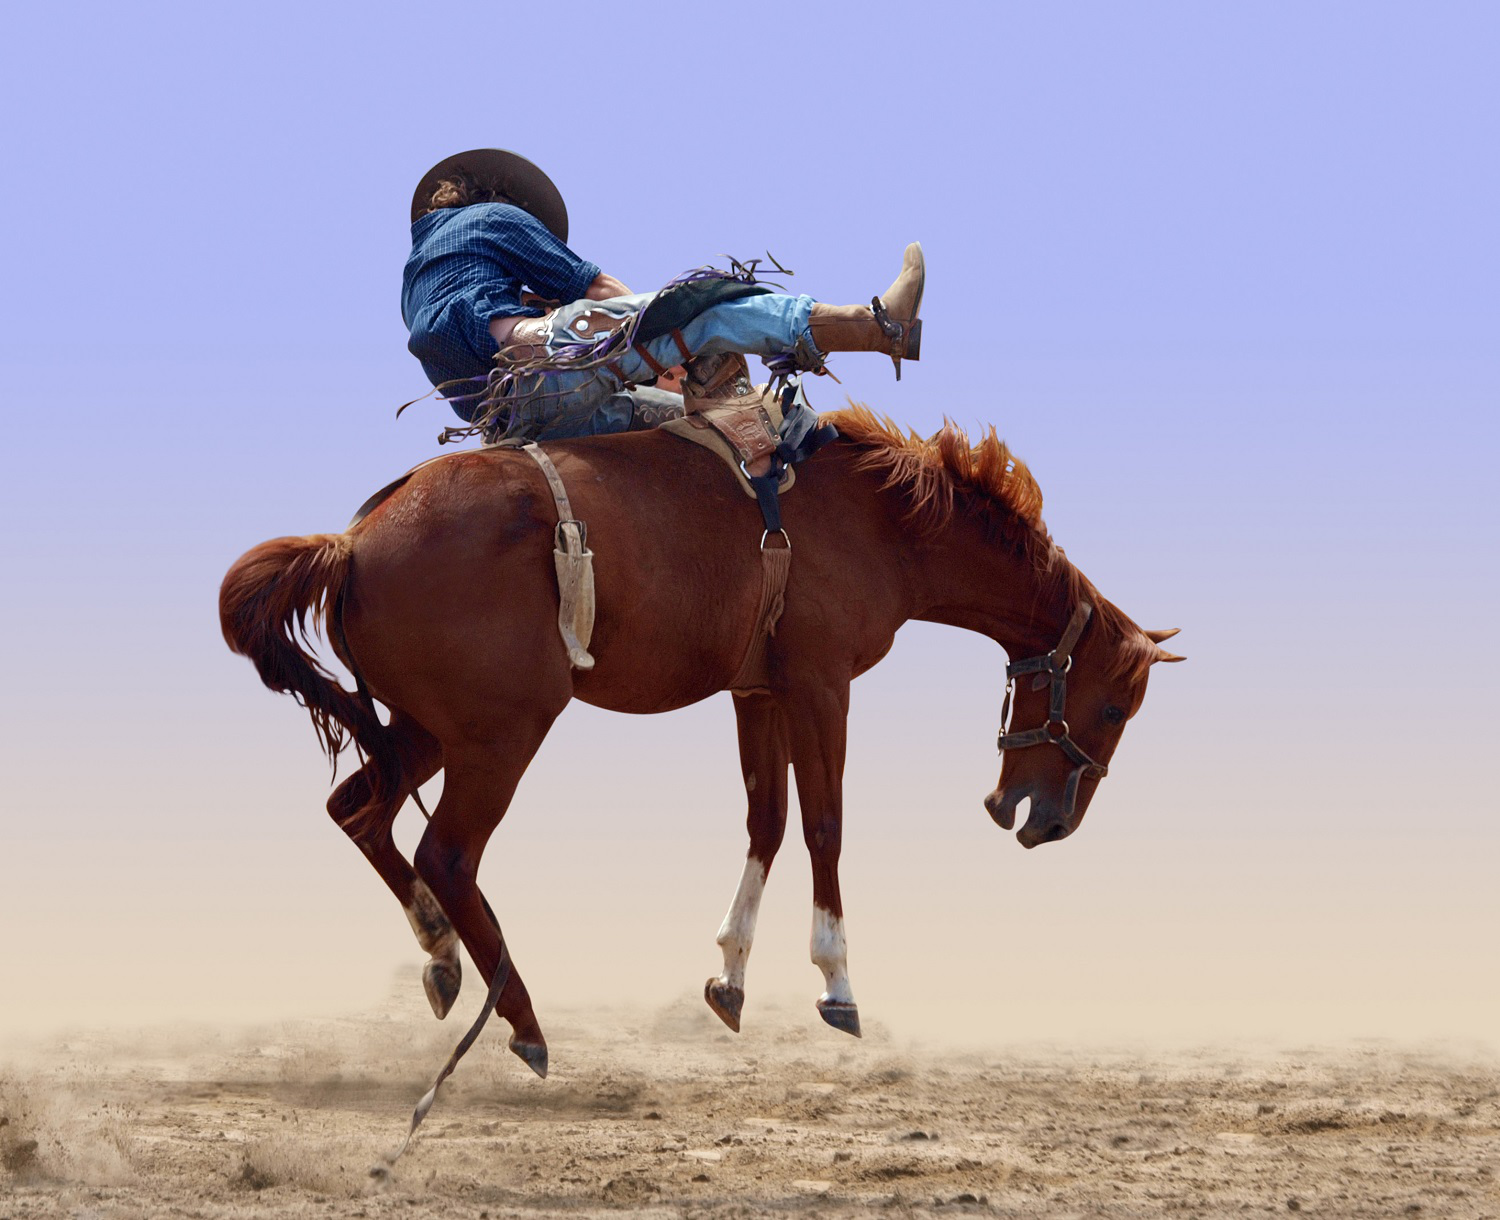

In [3]:
horse_url = 'https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/master/data/p1ch2/horse.jpg'

horse_raw = req.get(horse_url)

image_h = Image.open(BytesIO(horse_raw.content))
image_h

In [167]:
img_t = preprocess(image_h)

In [168]:
img_t

tensor([[[0.6902, 0.6902, 0.6902,  ..., 0.6902, 0.6902, 0.6902],
         [0.6863, 0.6863, 0.6863,  ..., 0.6902, 0.6902, 0.6863],
         [0.6902, 0.6863, 0.6902,  ..., 0.6902, 0.6902, 0.6902],
         ...,
         [0.7098, 0.6980, 0.6745,  ..., 0.7412, 0.7020, 0.7098],
         [0.6980, 0.6902, 0.6157,  ..., 0.7451, 0.7255, 0.7176],
         [0.5725, 0.5725, 0.5882,  ..., 0.6000, 0.6392, 0.7059]],

        [[0.7255, 0.7255, 0.7255,  ..., 0.7255, 0.7255, 0.7255],
         [0.7216, 0.7216, 0.7216,  ..., 0.7255, 0.7255, 0.7216],
         [0.7255, 0.7216, 0.7255,  ..., 0.7255, 0.7255, 0.7255],
         ...,
         [0.6235, 0.6078, 0.5882,  ..., 0.6392, 0.6000, 0.6078],
         [0.6078, 0.6000, 0.5333,  ..., 0.6431, 0.6235, 0.6157],
         [0.4902, 0.4941, 0.4980,  ..., 0.4902, 0.5373, 0.6039]],

        [[0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
         [0.9529, 0.9529, 0.9529,  ..., 0.9569, 0.9569, 0.9529],
         [0.9569, 0.9529, 0.9569,  ..., 0.9569, 0.9569, 0.

In [169]:
batch_t = torch.unsqueeze(img_t, 0)
batch_t

tensor([[[[0.6902, 0.6902, 0.6902,  ..., 0.6902, 0.6902, 0.6902],
          [0.6863, 0.6863, 0.6863,  ..., 0.6902, 0.6902, 0.6863],
          [0.6902, 0.6863, 0.6902,  ..., 0.6902, 0.6902, 0.6902],
          ...,
          [0.7098, 0.6980, 0.6745,  ..., 0.7412, 0.7020, 0.7098],
          [0.6980, 0.6902, 0.6157,  ..., 0.7451, 0.7255, 0.7176],
          [0.5725, 0.5725, 0.5882,  ..., 0.6000, 0.6392, 0.7059]],

         [[0.7255, 0.7255, 0.7255,  ..., 0.7255, 0.7255, 0.7255],
          [0.7216, 0.7216, 0.7216,  ..., 0.7255, 0.7255, 0.7216],
          [0.7255, 0.7216, 0.7255,  ..., 0.7255, 0.7255, 0.7255],
          ...,
          [0.6235, 0.6078, 0.5882,  ..., 0.6392, 0.6000, 0.6078],
          [0.6078, 0.6000, 0.5333,  ..., 0.6431, 0.6235, 0.6157],
          [0.4902, 0.4941, 0.4980,  ..., 0.4902, 0.5373, 0.6039]],

         [[0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569],
          [0.9529, 0.9529, 0.9529,  ..., 0.9569, 0.9569, 0.9529],
          [0.9569, 0.9529, 0.9569,  ..., 0

In [170]:
batch_out = net_g(batch_t)

In [171]:
out_t = (batch_out.data.squeeze() + 1) / 2

In [172]:
from torchvision import transforms
out_img = transforms.ToPILImage()(out_t)

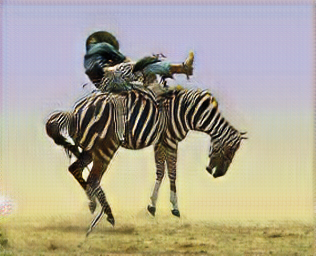

In [173]:
out_img

In [177]:
resnet18_model = torch.hub.load('pytorch/vision:master', 'resnet18', pretrained=True)

Downloading: "https://github.com/pytorch/vision/archive/master.zip" to C:\Users\AbdulrazzakAbd/.cache\torch\hub\master.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\AbdulrazzakAbd/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [179]:
url_horse = 'https://www.thesprucepets.com/thmb/KYaXBSM013GnZ2jEZJnX4a9oIsU=/3865x2174/smart/filters:no_upscale()/horse-galloping-in-grass-688899769-587673275f9b584db3a44cdf.jpg'

horse_data = req.get(url_horse)

horse_img = Image.open(BytesIO(horse_data.content))

In [181]:
h_img_p = preprocess(horse_img)

In [183]:
batch_t = torch.unsqueeze(h_img_p, 0)

In [185]:
output_t = net_g(batch_t)

In [187]:
img_out = transforms.ToPILImage()((output_t.squeeze() + 1) / 2)